## Kopis Internal Data EDA

### Data Columns

> * 전송사업자코드 : SE000201
> * 전송사업자명 : 인터파크
> * 공연시설코드 : FC222284
> * 시설특성 : 민간(대학로 외)
> * 개관연도 : 2004.0
> * 주소 : 서울특별시 강남구 테헤란로113길 7 (삼성동)
> * 편의시설_레스토랑 여부 : N
> * 편의시설_카페 여부 : N
> * 편의시설_편의점 여부: N
> * 편의시설_놀이방 여부: N
> * 편의시설_수유실 여부 : N
> * 장애인시설_주차장 여부 : Y
> * 장애인시설_화장실 여부 : N
> * 장애인시설_경사로 여부 : N
> * 장애인시설_전용엘리베이터 여부 : Y
> * 주차시설_자체 여부 : Y
> * 주차시설_공영 여부 : N
> * 공연장코드 : FC222284-01
> * 좌석수 : 417
> * 장애인석 : 5
> * 무대시설_오케스트라피트 여부 : N
> * 무대시설_연습실 여부 : Y
> * 무대시설_분장실 여부 : Y
> * 무대시설_무대넓이: 12X6.5X10
> * 공연코드 : PF311183
> * 공연회차 :1
> * 공연일시 : 2023-01-01 11:00
> * 입장권고유번호 : T0900227605
> * 예매/취소일시 :  2022-12-21 18:27
> * 예매/취소구분 : 2
> * 예매/취소매수 : 1
> * 예매/취소금액: 55000
> * 예매/취소방식코드 : 3
> * 예매/취소방식명(관리시스템): 현장
> * 예매/취소방식명(전송처) : ES생활문화
> * 결제수단코드 : 1
> * 결제수단명(관리시스템) : 현금
> * 결제수단명(전송처) : 현금
> * 할인금액 : 0
> * 할인종류코드 : 99
> * 할인종류명(관리시스템) : 기타
> * 할인종류명(전송처) : NaN
> * 장당금액 : 55000 
> * 성별 : 0
> * 연령 : 0
> * 공연시작일자 : 2022-12-03
> * 공연종료일자 : 2023-01-01
> * 소요시간 : 1시간 10분
> * 장르명 : 뮤지컬
> * 세부장르명 : 뮤지컬
> * 공연지역명 : 서울
> * 출연진내용 : NaN
> * 제작진내용 : NaN
> * 기획제작사명 : (주)이에스생활문화 (ES생활문화)(주관), (주)깨비키즈(주최)
> * 원작자명 : NaN
> * 극작가명 : NaN
> * 수상실적 : NaN
> * 관람연령 : 전체 관람가
> * 아동공연 여부 : Y
> * 축제 여부 : N
> * 내한공연 여부 : N
> * 오픈런 여부 : N
> * 판매시작일시 : 2022/10/10 00:00:00
> * 판매종료일시 : 2023/01/01 09:00:00
> * 좌석등급 : 전석(55000)
> * 단독판매여부 : N
> * 판매좌석수 : 407
> * 판매페이지URL : http://ticket.interpark.com/Ticket/Goods/GoodsInfo.asp?GoodsCode=22013758

### Read Dataset

> * xlsx 파일을 csv로 변경(14시간 42분 정도)
> * Dask library로 I/O 시간 단축
> * 137552442 row * 68 columns
> * 좌석수 - 판매좌석수 = 남은 좌석수
> * 공연코드 공연일시별 남은 좌석수가 10개 이하인 공연코드는 인기공연

In [1]:
# 메모리 보존
%reset -f

In [19]:
import os
import dask.dataframe as dd
import time
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
# 폴더 경로 설정
folder_path = "/Users/myungjunlee/Desktop/repository/Kopis"

# 폴더 내 모든 CSV 파일 불러오기
all_files = []
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".csv"):
            all_files.append(os.path.join(root, file))

include_columns = ['공연코드', '주소', '공연일시', '좌석수', '판매좌석수', '예매/취소구분', '성별', '연령', '할인금액', '장당금액']

def read_csv_file(file_path):
    df = dd.read_csv(file_path, usecols=include_columns, dtype={'판매좌석수': 'object'})
    return df

start_time = time.time()

# 모든 파일의 데이터를 읽어서 하나의 Dask DataFrame으로 결합
dfs_s = [read_csv_file(file) for file in all_files]
dask_df = dd.concat(dfs_s)

# 결과 확인 (예시로 첫 번째 데이터프레임 출력)
print(dask_df.head(1))

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken to process {elapsed_time:.2f} seconds")

                                  주소  좌석수      공연코드              공연일시  \
0  서울특별시 마포구 양화로 45 (서교동, 메세나폴리스) 2층  296  PF307520  2023-12-25 10:30   

   예매/취소구분   할인금액   장당금액  성별    연령 판매좌석수  
0        1  24500  50000   1  1981     1  
Time taken to process 283.64 seconds


In [4]:
del dfs_s

In [5]:
print(dask_df.dtypes)
df_a = dask_df.compute()
df_a.head()

주소         string[pyarrow]
좌석수                  int64
공연코드       string[pyarrow]
공연일시       string[pyarrow]
예매/취소구분              int64
할인금액                 int64
장당금액                 int64
성별                   int64
연령                   int64
판매좌석수      string[pyarrow]
dtype: object


,주소,좌석수,공연코드,공연일시,예매/취소구분,할인금액,장당금액,성별,연령,판매좌석수
0,"서울특별시 마포구 양화로 45 (서교동, 메세나폴리스) 2층",296,PF307520,2023-12-25 10:30,1,24500,50000,1,1981,1
1,"서울특별시 마포구 양화로 45 (서교동, 메세나폴리스) 2층",296,PF307520,2023-12-25 10:30,1,24500,50000,1,1981,1
2,"서울특별시 마포구 양화로 45 (서교동, 메세나폴리스) 2층",296,PF307520,2023-12-25 10:30,1,23500,50000,2,1989,1
3,"서울특별시 마포구 양화로 45 (서교동, 메세나폴리스) 2층",296,PF307520,2023-12-25 10:30,1,23500,50000,2,1989,1
4,"서울특별시 마포구 양화로 45 (서교동, 메세나폴리스) 2층",296,PF307520,2023-12-25 10:30,1,23500,50000,2,1989,1


In [6]:
del dask_df

In [7]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137552442 entries, 0 to 99030
Data columns (total 10 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   주소       object
 1   좌석수      int64 
 2   공연코드     object
 3   공연일시     object
 4   예매/취소구분  int64 
 5   할인금액     int64 
 6   장당금액     int64 
 7   성별       int64 
 8   연령       int64 
 9   판매좌석수    object
dtypes: int64(6), object(4)
memory usage: 11.3+ GB


In [8]:
current_year = 2024

df_a['좌석수'] = df_a['좌석수'].fillna(0).astype('int32')
df_a['판매좌석수'] = df_a['판매좌석수'].str.replace(r'\D', '', regex=True).fillna('0').astype('int32')
df_a['예매/취소구분'] = df_a['예매/취소구분'].astype('int32')
df_a['성별'] = df_a['성별'].astype('int32')
df_a['연령'] = df_a['연령'].astype('int32')
df_a['할인금액'] = df_a['할인금액'].astype('int32')
df_a['장당금액'] = df_a['장당금액'].astype('int32')
df_a['공연일시'] = pd.to_datetime(df_a['공연일시'])
df_a['연'] = df_a['공연일시'].dt.year
df_a['월'] = df_a['공연일시'].dt.month
df_a['일'] = df_a['공연일시'].dt.day
df_a['시'] = df_a['공연일시'].dt.hour
df_a['분'] = df_a['공연일시'].dt.minute
df_a['요일'] = df_a['공연일시'].dt.weekday
df_a['남은 좌석수'] = df_a['좌석수'] - df_a['판매좌석수']
df_a = df_a.drop(columns=['좌석수','판매좌석수','공연일시'])
df_a['남은 좌석수'] = df_a['남은 좌석수'].apply(lambda x: max(x, 0))
df_a['연령'] = pd.to_numeric(df_a['연령'], errors='coerce')
df_a['나이'] = current_year - df_a['연령']
df_a = df_a[(df_a['나이'] >= 1) & (df_a['나이'] <= 100)]
df_a = df_a.dropna(subset=['나이'])
df_a = df_a.drop(columns=['연령'])

df_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83749155 entries, 0 to 99013
Data columns (total 14 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   주소       object
 1   공연코드     object
 2   예매/취소구분  int32 
 3   할인금액     int32 
 4   장당금액     int32 
 5   성별       int32 
 6   연        int32 
 7   월        int32 
 8   일        int32 
 9   시        int32 
 10  분        int32 
 11  요일       int32 
 12  남은 좌석수   int64 
 13  나이       int32 
dtypes: int32(11), int64(1), object(2)
memory usage: 5.9+ GB


In [9]:
for column in df_a.columns:
    unique_values = df_a[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values[:5]}... (total {len(unique_values)} unique values)")

    # 문자열 또는 범주형 데이터는 최대, 최소, 평균 계산 제외
    if df_a[column].dtype in ['int64', 'int32', 'float64']:
        min_value = df_a[column].min()
        max_value = df_a[column].max()
        mean_value = df_a[column].mean()
        print(f"Min: {min_value}, Max: {max_value}, Mean: {mean_value:.2f}")
    else:
        print("Min: N/A, Max: N/A, Mean: N/A")
    
    print("\n")

Column: 주소
Unique Values: ['서울특별시 마포구 양화로 45 (서교동, 메세나폴리스) 2층' '대구광역시 달성군 화원읍 비슬로520길 6 '
 '서울특별시 종로구 대학로 128(동숭동) 21세기빌딩 5층' '경기도 파주시 탄현면 성동리 53-2 '
 '경기도 화성시 동탄대로 537 (오산동) 라스플로레스 B동 508호']... (total 2084 unique values)
Min: N/A, Max: N/A, Mean: N/A


Column: 공연코드
Unique Values: ['PF307520' 'PF454103' 'PF442892' 'PF360987' 'PF439496']... (total 54340 unique values)
Min: N/A, Max: N/A, Mean: N/A


Column: 예매/취소구분
Unique Values: [1 2]... (total 2 unique values)
Min: 1, Max: 2, Mean: 1.26


Column: 할인금액
Unique Values: [24500 23500  5000 18300     0]... (total 1602 unique values)
Min: 0, Max: 891000, Mean: 1439.61


Column: 장당금액
Unique Values: [ 50000  25000 120000  28900  27900]... (total 2512 unique values)
Min: 0, Max: 64870000, Mean: 68466.13


Column: 성별
Unique Values: [1 2 0]... (total 3 unique values)
Min: 0, Max: 2, Mean: 1.57


Column: 연
Unique Values: [2023 2021 2020 2019 2022]... (total 5 unique values)
Min: 2019, Max: 2023, Mean: 2021.68


Column: 월
Unique Values: [12  4  5  

In [10]:
df_a.rename(columns={
    '주소': 'address',
    '공연코드': 'pcode',
    '예매/취소구분': 'booking_status',
    '남은 좌석수': 'remaining',
    '성별': 'gender',
    '나이': 'age',
    '할인금액': 'discounted',
    '장당금액': 'price',
    '연': 'year',
    '월': 'month',
    '일': 'day',
    '시': 'hour',
    '분': 'minute',
    '요일': 'week'
}, inplace=True)

In [12]:
df_a.head()

,address,pcode,booking_status,discounted,price,gender,year,month,day,hour,minute,week,remaining,age
0,"서울특별시 마포구 양화로 45 (서교동, 메세나폴리스) 2층",PF307520,1,24500,50000,1,2023,12,25,10,30,0,295,43
1,"서울특별시 마포구 양화로 45 (서교동, 메세나폴리스) 2층",PF307520,1,24500,50000,1,2023,12,25,10,30,0,295,43
2,"서울특별시 마포구 양화로 45 (서교동, 메세나폴리스) 2층",PF307520,1,23500,50000,2,2023,12,25,10,30,0,295,35
3,"서울특별시 마포구 양화로 45 (서교동, 메세나폴리스) 2층",PF307520,1,23500,50000,2,2023,12,25,10,30,0,295,35
4,"서울특별시 마포구 양화로 45 (서교동, 메세나폴리스) 2층",PF307520,1,23500,50000,2,2023,12,25,10,30,0,295,35


### Definition IQR function

> * IQR(Interquartile Range, 사분위 범위)는 데이터의 중앙 50%를 나타내는 값, IQR은 데이터의 3사분위수(Q3, 75번째 백분위수)에서 1사분위수(Q1, 25번째 백분위수)를 뺀 값으로 데이터의 중간 50%을 포착하여, 이상치를 감지하는 역할
> * 할인금액은 Z-score 기반 이상치 제거

In [28]:
def iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lb = max(q1 - 1.5 * iqr, 0)
    ub = q3 + 1.5 * iqr
    return lb, ub

d_n_z = df_a['discounted'][df_a['discounted'] > 0]

d_l, d_u = iqr(d_n_z)
p_l, p_u = iqr(df_a['price'])
r_l, r_u = iqr(df_a['remaining'])

print(d_l, d_u, p_l, p_u, r_l, r_u)

0 48000.0 0 272500.0 0 2386.5


### Remove Outliers

In [29]:
df_a = df_a[
    (df_a['discounted'] >= d_l) & (df_a['discounted'] <= d_u) &
    (df_a['price'] >= p_l) & (df_a['price'] <= p_u) &
    (df_a['remaining'] >= r_l) & (df_a['remaining'] <= r_u)
].reset_index(drop=True)

df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73727192 entries, 0 to 73727191
Data columns (total 14 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   address         object
 1   pcode           object
 2   booking_status  int32 
 3   discounted      int32 
 4   price           int32 
 5   gender          int32 
 6   year            int32 
 7   month           int32 
 8   day             int32 
 9   hour            int32 
 10  minute          int32 
 11  week            int32 
 12  remaining       int64 
 13  age             int32 
dtypes: int32(11), int64(1), object(2)
memory usage: 4.7+ GB


In [30]:
df_a['remaining']=df_a['remaining'].astype('int32')

### 공연코드 공연일시로 Groupby

In [33]:
df_g = df_a.groupby(['pcode', 'year', 'month', 'day', 'hour', 'minute', 'week']).agg(
    address=('address', 'first'),
    n_remaining=('remaining', 'first'),
    n_booking=('booking_status', lambda x: (x == 1).sum()),
    n_cancel=('booking_status', lambda x: (x == 2).sum()),
    n_gender_0=('gender', lambda x: (x == 0).sum()),
    n_gender_1=('gender', lambda x: (x == 1).sum()),
    n_gender_2=('gender', lambda x: (x == 2).sum()),
    m_discounted=('discounted', 'mean'),
    m_price=('price', 'mean'),
    m_age=('age', 'mean')
).reset_index()

df_g.head(1)

,pcode,year,month,day,hour,minute,week,address,n_remaining,n_booking,n_cancel,n_gender_0,n_gender_1,n_gender_2,m_discounted,m_price,m_age
0,PF300000,2022,6,3,16,0,4,경상북도 구미시 인동가산로 392 (구평동) 강동문화복지회관 강동문화복지회관,429,272,43,0,69,246,0.000000,32404.761905,39.961905
1,PF300000,2022,6,4,11,0,5,경상북도 구미시 인동가산로 392 (구평동) 강동문화복지회관 강동문화복지회관,666,488,149,0,96,541,4.709576,32232.339089,39.706436
2,PF300000,2022,6,4,14,0,5,경상북도 구미시 인동가산로 392 (구평동) 강동문화복지회관 강동문화복지회관,429,457,123,0,128,452,0.000000,32053.448276,41.294828
3,PF300000,2022,6,5,11,0,6,경상북도 구미시 인동가산로 392 (구평동) 강동문화복지회관 강동문화복지회관,429,419,125,0,103,441,0.000000,31894.301471,39.711397
4,PF300000,2022,6,5,14,0,6,경상북도 구미시 인동가산로 392 (구평동) 강동문화복지회관 강동문화복지회관,429,468,154,0,87,535,0.000000,31916.398714,40.101286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367935,PF455663,2023,11,25,16,0,5,강원특별자치도 춘천시 자라우길 31-1 (칠전동) 지하,0,18,1,0,3,16,8947.368421,20000.000000,52.315789
367936,PF455920,2023,3,12,11,0,6,부산광역시 금정구 기찰로108번길 49 (부곡동) 지하 1층,99,38,8,0,27,19,0.000000,9900.000000,41.826087
367937,PF455920,2023,3,12,14,0,6,부산광역시 금정구 기찰로108번길 49 (부곡동) 지하 1층,99,45,6,0,18,33,0.000000,9900.000000,40.411765
367938,PF455927,2023,3,10,19,30,4,경상남도 밀양시 밀양대공원로 112 (교동) 밀양아리랑아트센터,0,142,7,149,0,0,1315.436242,10000.000000,55.832215


In [34]:
del df_a

In [35]:
df_g = df_g.drop_duplicates()
df_g = df_g.reset_index(drop=True)
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367940 entries, 0 to 367939
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   pcode         367940 non-null  object 
 1   year          367940 non-null  int32  
 2   month         367940 non-null  int32  
 3   day           367940 non-null  int32  
 4   hour          367940 non-null  int32  
 5   minute        367940 non-null  int32  
 6   week          367940 non-null  int32  
 7   address       367940 non-null  object 
 8   n_remaining   367940 non-null  int32  
 9   n_booking     367940 non-null  int64  
 10  n_cancel      367940 non-null  int64  
 11  n_gender_0    367940 non-null  int64  
 12  n_gender_1    367940 non-null  int64  
 13  n_gender_2    367940 non-null  int64  
 14  m_discounted  367940 non-null  float64
 15  m_price       367940 non-null  float64
 16  m_age         367940 non-null  float64
dtypes: float64(3), int32(7), int64(5), object(2)
mem

In [41]:
df_g = df_g.drop(columns=['n_booking', 'n_cancel'])

In [42]:
df_g['pcode'].value_counts()

pcode
PF343804    4928
PF352013    3531
PF392163    3395
PF394750    3291
PF356520    2597
            ... 
PF388325       1
PF306559       1
PF306558       1
PF306557       1
PF456658       1
Name: count, Length: 53759, dtype: int64

In [44]:
df_343804 = df_g[df_g['pcode'] == 'PF343804']

In [45]:
df_343804.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4928 entries, 84065 to 88992
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pcode         4928 non-null   object 
 1   year          4928 non-null   int32  
 2   month         4928 non-null   int32  
 3   day           4928 non-null   int32  
 4   hour          4928 non-null   int32  
 5   minute        4928 non-null   int32  
 6   week          4928 non-null   int32  
 7   address       4928 non-null   object 
 8   n_remaining   4928 non-null   int32  
 9   n_gender_0    4928 non-null   int64  
 10  n_gender_1    4928 non-null   int64  
 11  n_gender_2    4928 non-null   int64  
 12  m_discounted  4928 non-null   float64
 13  m_price       4928 non-null   float64
 14  m_age         4928 non-null   float64
dtypes: float64(3), int32(7), int64(3), object(2)
memory usage: 481.2+ KB


In [47]:
df_343804['address'].unique()

array(['서울특별시 종로구 대학로10길 24 (동숭동) 지하 1층'], dtype=object)

In [48]:
df_343804.drop(columns=['pcode', 'address'], inplace=True)

/var/folders/57/pvg3596n2zsbnccy02dlj1w40000gn/T/ipykernel_60013/2142293147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_343804.drop(columns=['pcode', 'address'], inplace=True)


In [50]:
df_343804.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4928 entries, 84065 to 88992
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          4928 non-null   int32  
 1   month         4928 non-null   int32  
 2   day           4928 non-null   int32  
 3   hour          4928 non-null   int32  
 4   minute        4928 non-null   int32  
 5   week          4928 non-null   int32  
 6   n_remaining   4928 non-null   int32  
 7   n_gender_0    4928 non-null   int64  
 8   n_gender_1    4928 non-null   int64  
 9   n_gender_2    4928 non-null   int64  
 10  m_discounted  4928 non-null   float64
 11  m_price       4928 non-null   float64
 12  m_age         4928 non-null   float64
dtypes: float64(3), int32(7), int64(3)
memory usage: 404.2 KB


### Data Scaling

In [52]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [54]:
df_s = mms.fit_transform(df_343804) 
df_s = pd.DataFrame(df_s, columns=df_343804.columns)
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4928 entries, 0 to 4927
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          4928 non-null   float64
 1   month         4928 non-null   float64
 2   day           4928 non-null   float64
 3   hour          4928 non-null   float64
 4   minute        4928 non-null   float64
 5   week          4928 non-null   float64
 6   n_remaining   4928 non-null   float64
 7   n_gender_0    4928 non-null   float64
 8   n_gender_1    4928 non-null   float64
 9   n_gender_2    4928 non-null   float64
 10  m_discounted  4928 non-null   float64
 11  m_price       4928 non-null   float64
 12  m_age         4928 non-null   float64
dtypes: float64(13)
memory usage: 500.6 KB


In [55]:
df_s.head(3)

,year,month,day,hour,minute,week,n_remaining,n_gender_0,n_gender_1,n_gender_2,m_discounted,m_price,m_age
0,0.0,0.545455,0.0,0.285714,0.0,0.0,0.0,0.015083,0.059783,0.050000,0.0,0.127119,0.498459
1,0.0,0.545455,0.0,0.428571,0.3,0.0,0.0,0.028658,0.125000,0.037037,0.0,0.160588,0.416399
2,0.0,0.545455,0.0,0.571429,0.6,0.0,0.0,0.015083,0.105978,0.061111,0.0,0.192073,0.444937


### Box plot

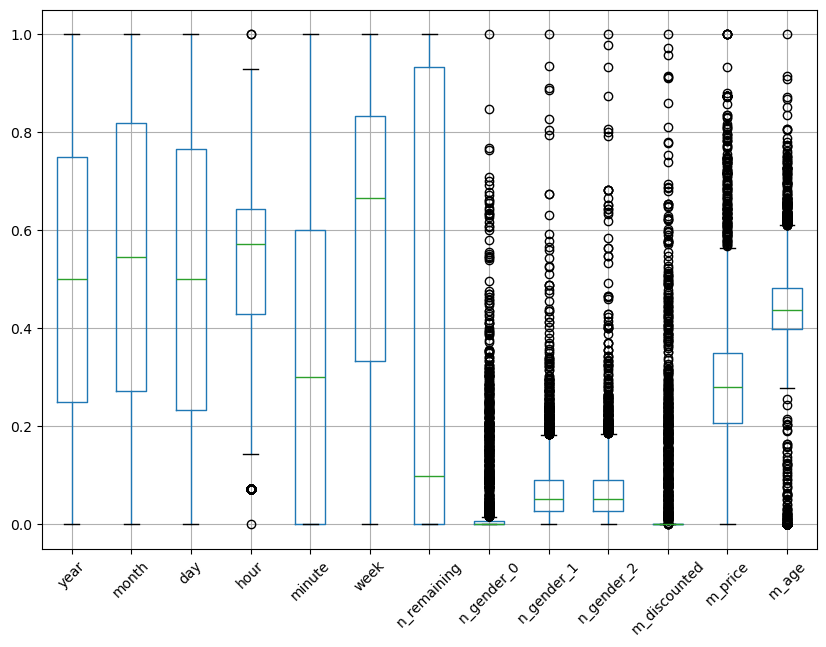

In [57]:
fig = plt.figure(figsize =(10, 7))
boxplot = df_s.boxplot(column = list(df_s.columns))
plt.xticks(rotation=45)
plt.show()

### ScatterPlot

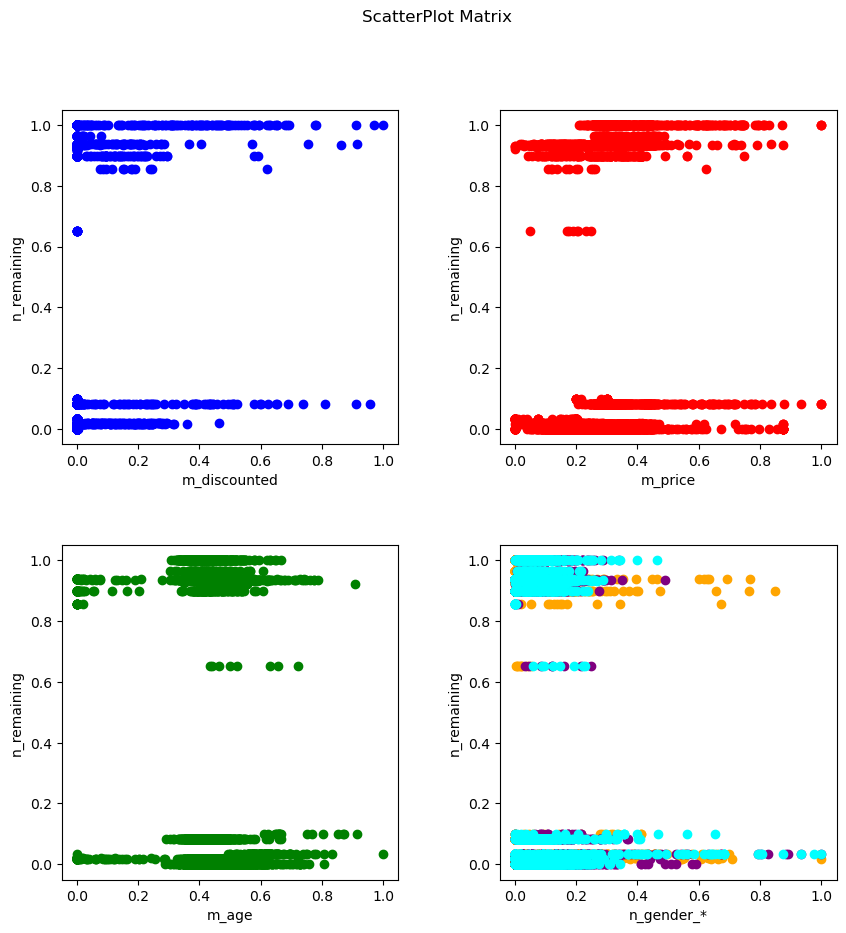

In [58]:
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='none', sharey='none')

fig.suptitle('ScatterPlot Matrix')

ax1.scatter(df_s["m_discounted"], df_s["n_remaining"], c="blue")
ax1.set(xlabel='m_discounted', ylabel='n_remaining')

ax2.scatter(df_s["m_price"], df_s["n_remaining"], c="red")
ax2.set(xlabel='m_price', ylabel='n_remaining')

ax3.scatter(df_s["m_age"], df_s["n_remaining"], c="green")
ax3.set(xlabel='m_age', ylabel='n_remaining')

ax4.scatter(df_s["n_gender_0"], df_s["n_remaining"], c="orange", label='Gender 0')
ax4.scatter(df_s["n_gender_1"], df_s["n_remaining"], c="purple", label='Gender 1')
ax4.scatter(df_s["n_gender_2"], df_s["n_remaining"], c="cyan", label='Gender 2')
ax4.set(xlabel='n_gender_*', ylabel='n_remaining')

plt.show()

### Corrlation

In [59]:
corrMatrix = df_s.corr()
print (corrMatrix)

                  year     month       day      hour    minute      week  \
year          1.000000 -0.204341 -0.015167 -0.001820 -0.057961  0.039981   
month        -0.204341  1.000000  0.031757 -0.002641  0.010930 -0.011344   
day          -0.015167  0.031757  1.000000 -0.071259  0.027974 -0.022145   
hour         -0.001820 -0.002641 -0.071259  1.000000 -0.081954 -0.067966   
minute       -0.057961  0.010930  0.027974 -0.081954  1.000000  0.222811   
week          0.039981 -0.011344 -0.022145 -0.067966  0.222811  1.000000   
n_remaining   0.115686 -0.015210 -0.034822  0.045306 -0.049121  0.020712   
n_gender_0    0.031616 -0.206958  0.068664 -0.206912  0.005164 -0.011815   
n_gender_1   -0.153792  0.164911  0.102553 -0.196563 -0.045580  0.154898   
n_gender_2   -0.065037  0.173624  0.163328 -0.316928 -0.023449  0.037547   
m_discounted  0.274053  0.043148  0.019009  0.009493 -0.084539  0.015281   
m_price       0.468490  0.265023  0.072091  0.029784 -0.067306  0.227152   
m_age       

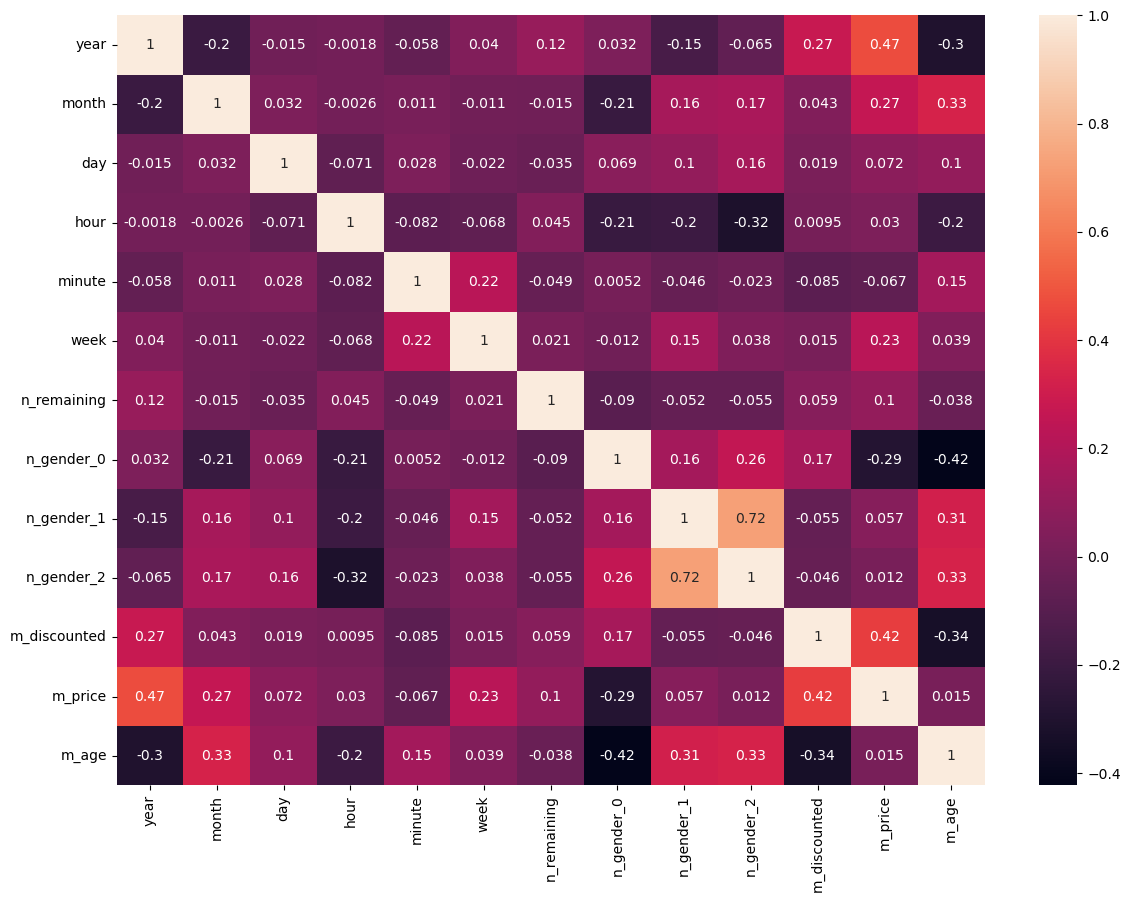

In [61]:
fig = plt.figure(figsize =(14, 10))
sns.heatmap(corrMatrix, annot=True)
plt.show()